<a href="https://colab.research.google.com/github/Likhita-T/FutureMakers/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam, SGD

from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
print("X_train", X_train.shape)
print("X_test", X_test.shape)

X_train (60000, 28, 28)
X_test (10000, 28, 28)


Text(0, 0.5, 'Counts')

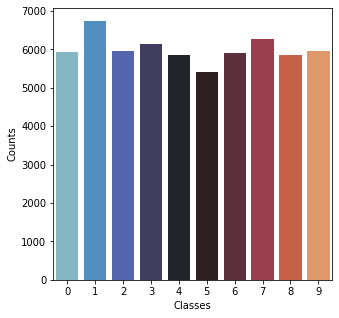

In [31]:
# Labelling counts
plt.figure(figsize=(5,5))
g= sns.countplot(y_train, palette="icefire")
plt.xlabel("Classes")
plt.ylabel("Counts")

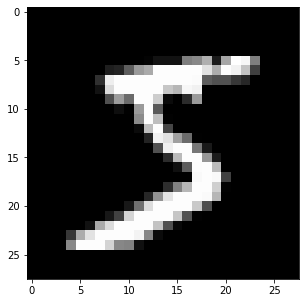

In [32]:
img = X_train[0]
plt.figure(figsize = (5,5))  # do plt.figure(figsize = (5,5))
plt.imshow(img,cmap = "gray")

In [33]:
X_train = X_train/255.0
X_test = X_test/255.0

img2 = X_train[0]
plt.figure(figsize=(5,5))

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

In [34]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [35]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [36]:
# Reshape 4D
print(X_train.shape)
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)

print(X_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [37]:
#conv - pooling - conv - pool - fallen - dense -dense

model = Sequential()
model.add(Conv2D(filters=20, kernel_size=(3,3),activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=10, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=10,activation='softmax'))

In [38]:
model.summary() #summary is a function, so need to put () after "summary"

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 10)        1810      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16064     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

In [39]:
optimer = SGD(learning_rate=0.001,momentum=0.99)


In [40]:
model.compile(optimizer=optimer, loss='categorical_crossentropy', metrics=['accuracy']) # typo in the loss function name, previously it was "categorical crossentropy"

In [41]:
BATCH_SIZE = 32
EPOCHS = 10

In [42]:
history = model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 52s 21ms/step - loss: 0.8233 - accuracy: 0.7218 - val_loss: 0.0734 - val_accuracy: 0.9759
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1066 - accuracy: 0.9677 - val_loss: 0.0562 - val_accuracy: 0.9810
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0829 - accuracy: 0.9741 - val_loss: 0.0484 - val_accuracy: 0.9845
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0642 - accuracy: 0.9802 - val_loss: 0.0465 - val_accuracy: 0.9844
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0580 - accuracy: 0.9817 - val_loss: 0.0437 - val_accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0484 - accuracy: 0.9847 - val_loss: 0.0336 - val_accuracy: 0.9890
Epoch 7/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0427 - accuracy: 0.9870 - val_loss: 0.0373 -

In [ ]:
fig = plt.figure(figsize=(7,7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.grid()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show

NameError: ignored

<Figure size 504x504 with 0 Axes>

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_train[0]

y_true = np.argmax(y_Train,axis=1)
cm = confusion_matrix(y_true=y_true,y_pred=y_pred_train)
fig = plt.figure(figsize=(10,10))
sns.heatmap(cm,cmap='Greens', annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")

ValueError: ignored

In [ ]:
model.evaluate(X_test,y_test)